In [15]:
import duckdb as dk
import pandas as pd
import time
import datetime
import os

In [112]:
conn = dk.connect(':memory:')
# conn = dk.connect()
conn.execute('INSTALL spatial') # 확장프로그램(spatial) 최초 한번만 실행하면 됨
conn.execute('LOAD spatial') # 확장프로그램(spatial) 최초 한번만 실행하면 됨

---
### EXCEL  -st_read()

In [121]:
start = time.time()
conn.sql("CREATE TABLE new_table AS SELECT * FROM st_read('./duckdb/dugo.xlsx');")
end = time.time()
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

0:00:28.520711


In [122]:
conn.sql('select * from information_schema.tables;')

┌───────────────┬──────────────┬────────────┬────────────┬───┬────────────────────┬──────────┬───────────────┐
│ table_catalog │ table_schema │ table_name │ table_type │ … │ is_insertable_into │ is_typed │ commit_action │
│    varchar    │   varchar    │  varchar   │  varchar   │   │      varchar       │ varchar  │    varchar    │
├───────────────┼──────────────┼────────────┼────────────┼───┼────────────────────┼──────────┼───────────────┤
│ memory        │ main         │ insurance2 │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
│ memory        │ main         │ new_table  │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
├───────────────┴──────────────┴────────────┴────────────┴───┴────────────────────┴──────────┴───────────────┤
│ 2 rows                                                                                12 columns (7 shown) │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [124]:
conn.sql("select 검사결과등록세관부호,count(*) cns from new_table group by 검사결과등록세관부호 order by 2 desc;")

┌──────────────────────┬────────┐
│ 검사결과등록세관부호 │  cns   │
│       varchar        │ int64  │
├──────────────────────┼────────┤
│ 040                  │ 775718 │
│ 140                  │  83316 │
│ 041                  │  47430 │
│ 020                  │  31828 │
│ 120                  │  27901 │
│ 016                  │  24053 │
│ 030                  │  19800 │
│ 090                  │  11918 │
│ 080                  │  11173 │
│ 071                  │   7683 │
│  ·                   │      · │
│  ·                   │      · │
│  ·                   │      · │
│ 053                  │      9 │
│ 154                  │      6 │
│ 050                  │      5 │
│ 122                  │      5 │
│ 054                  │      5 │
│ 103                  │      4 │
│ 052                  │      4 │
│ 012                  │      3 │
│ 051                  │      2 │
│ 017                  │      1 │
├──────────────────────┴────────┤
│ 27 rows (20 shown)  2 columns │
└───────────────────────

---
### duckdb metadata 및 internal function

In [18]:
os.listdir()

['.ipynb_checkpoints', 'duckdb']

In [21]:
conn.table(table_name='new_table')
# conn.sql('select * from new_table;').show()

┌─────────────────┬──────────────────────┬───┬───────────────────┬───────────────────┬──────────────┐
│ 휴대품관리번호  │ 검사결과등록세관부호 │ … │ 유치면세물품구분2 │ 유치면세물품구분3 │ 특이사항내역 │
│     varchar     │       varchar        │   │      varchar      │      varchar      │   varchar    │
├─────────────────┼──────────────────────┼───┼───────────────────┼───────────────────┼──────────────┤
│ 040A42018022202 │ 040                  │ … │ NULL              │ NULL              │ NULL         │
│ 120212018021425 │ 120                  │ … │ NULL              │ NULL              │ NULL         │
│ 040A62018021850 │ 040                  │ … │ NULL              │ NULL              │ NULL         │
│ 120212018021426 │ 120                  │ … │ NULL              │ NULL              │ NULL         │
│ 040A62018021851 │ 040                  │ … │ NULL              │ NULL              │ NULL         │
│ 040242018023767 │ 040                  │ … │ NULL              │ NULL              │ NULL         │
│ 140212018026820 │

In [100]:
conn.sql('select * from information_schema.tables;')

┌───────────────┬──────────────┬────────────┬────────────┬───┬────────────────────┬──────────┬───────────────┐
│ table_catalog │ table_schema │ table_name │ table_type │ … │ is_insertable_into │ is_typed │ commit_action │
│    varchar    │   varchar    │  varchar   │  varchar   │   │      varchar       │ varchar  │    varchar    │
├───────────────┼──────────────┼────────────┼────────────┼───┼────────────────────┼──────────┼───────────────┤
│ memory        │ main         │ new_table  │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
│ memory        │ main         │ insurance2 │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
│ temp          │ main         │ insurance  │ VIEW       │ … │ NO                 │ NO       │ NULL          │
├───────────────┴──────────────┴────────────┴────────────┴───┴────────────────────┴──────────┴───────────────┤
│ 3 rows                                                                                12 columns (7 shown) │
└

In [37]:
conn.sql("select * from information_schema.tables where table_name= 'new_table' ;")

┌───────────────┬──────────────┬────────────┬────────────┬───┬────────────────────┬──────────┬───────────────┐
│ table_catalog │ table_schema │ table_name │ table_type │ … │ is_insertable_into │ is_typed │ commit_action │
│    varchar    │   varchar    │  varchar   │  varchar   │   │      varchar       │ varchar  │    varchar    │
├───────────────┼──────────────┼────────────┼────────────┼───┼────────────────────┼──────────┼───────────────┤
│ memory        │ main         │ new_table  │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
├───────────────┴──────────────┴────────────┴────────────┴───┴────────────────────┴──────────┴───────────────┤
│ 1 rows                                                                                12 columns (7 shown) │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [44]:
conn.sql("select column_name,data_type,character_octet_length from information_schema.columns where table_name= 'new_table' ;")

┌──────────────────────┬───────────┬────────────────────────┐
│     column_name      │ data_type │ character_octet_length │
│       varchar        │  varchar  │         int32          │
├──────────────────────┼───────────┼────────────────────────┤
│ 휴대품관리번호       │ VARCHAR   │                   NULL │
│ 검사결과등록세관부호 │ VARCHAR   │                   NULL │
│ 검사결과등록과코드   │ VARCHAR   │                   NULL │
│ 휴대품검사일자       │ VARCHAR   │                   NULL │
│ 휴대품검사사유코드1  │ VARCHAR   │                   NULL │
│ 휴대품검사사유코드2  │ VARCHAR   │                   NULL │
│ 휴대품검사사유코드3  │ VARCHAR   │                   NULL │
│ 휴대품검사사유코드4  │ VARCHAR   │                   NULL │
│ 휴대품검사결과코드1  │ VARCHAR   │                   NULL │
│ 휴대품검사결과코드2  │ VARCHAR   │                   NULL │
│ 검사상세결과코드1    │ VARCHAR   │                   NULL │
│ 검사상세결과코드2    │ VARCHAR   │                   NULL │
│ 면세물품유형코드     │ VARCHAR   │                   NULL │
│ 면세물품대분류코드1  │ VARCHAR   │                   NULL │
│ 면세

In [45]:
conn.sql('select * from information_schema.schemata;')

┌──────────────┬────────────────────┬──────────────┬───┬──────────────────────┬──────────────────────┬──────────┐
│ catalog_name │    schema_name     │ schema_owner │ … │ default_character_…  │ default_character_…  │ sql_path │
│   varchar    │      varchar       │   varchar    │   │        int32         │        int32         │ varchar  │
├──────────────┼────────────────────┼──────────────┼───┼──────────────────────┼──────────────────────┼──────────┤
│ memory       │ information_schema │ duckdb       │ … │                 NULL │                 NULL │ NULL     │
│ memory       │ main               │ duckdb       │ … │                 NULL │                 NULL │ NULL     │
│ memory       │ pg_catalog         │ duckdb       │ … │                 NULL │                 NULL │ NULL     │
│ system       │ information_schema │ duckdb       │ … │                 NULL │                 NULL │ NULL     │
│ system       │ main               │ duckdb       │ … │                 NULL │         

In [49]:
conn.sql("select sql from duckdb_views();")

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                         sql                                                          │
│                                                       varchar                                                        │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ SELECT database_name table_catalog, schema_name table_schema, table_name, column_name, column_index ordinal_positi…  │
│ SELECT database_name catalog_name, schema_name, 'duckdb' schema_owner, NULL default_character_set_catalog, NULL de…  │
│ SELECT database_name table_catalog, schema_name table_schema, table_name, CASE WHEN temporary THEN 'LOCAL TEMPORAR…  │
│ SELECT database_oid AS seq, database_name AS name, path AS file FROM duckdb_databases() WHERE NOT internal ORDER B…  │
│ select 'table' "type", table_n

In [50]:
conn.sql("select * from duckdb_columns();")

┌───────────────┬──────────────┬────────────────────┬───┬───────────────────┬──────────────────────┬───────────────┐
│ database_name │ database_oid │    schema_name     │ … │ numeric_precision │ numeric_precision_…  │ numeric_scale │
│    varchar    │    int64     │      varchar       │   │       int32       │        int32         │     int32     │
├───────────────┼──────────────┼────────────────────┼───┼───────────────────┼──────────────────────┼───────────────┤
│ memory        │          916 │ information_schema │ … │              NULL │                 NULL │          NULL │
│ memory        │          916 │ information_schema │ … │              NULL │                 NULL │          NULL │
│ memory        │          916 │ information_schema │ … │              NULL │                 NULL │          NULL │
│ memory        │          916 │ information_schema │ … │              NULL │                 NULL │          NULL │
│ memory        │          916 │ information_schema │ … │       

In [52]:
conn.sql("select * from duckdb_databases();")

┌───────────────┬──────────────┬─────────┬──────────┬─────────┐
│ database_name │ database_oid │  path   │ internal │  type   │
│    varchar    │    int64     │ varchar │ boolean  │ varchar │
├───────────────┼──────────────┼─────────┼──────────┼─────────┤
│ memory        │          916 │ NULL    │ false    │ duckdb  │
│ system        │            0 │ NULL    │ true     │ duckdb  │
│ temp          │         1354 │ NULL    │ true     │ duckdb  │
└───────────────┴──────────────┴─────────┴──────────┴─────────┘

In [74]:
conn.sql("select sql from duckdb_tables() where table_name = 'new_table';")

┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                         sql                                                          │
│                                                       varchar                                                        │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ CREATE TABLE new_table("휴대품관리번호" VARCHAR, "검사결과등록세관부호" VARCHAR, "검사결과등록과코드" VARCHAR, "휴…  │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [54]:
conn.sql("select install_path from duckdb_extensions() where extension_name ='spatial';")

┌────────────────────────────────────────────────────────────────────────────────┐
│                                  install_path                                  │
│                                    varchar                                     │
├────────────────────────────────────────────────────────────────────────────────┤
│ C:\Users\user\.duckdb\extensions\v0.8.1\windows_amd64\spatial.duckdb_extension │
└────────────────────────────────────────────────────────────────────────────────┘

In [55]:
conn.sql("select * from duckdb_extensions() ;")

┌──────────────────┬─────────┬───────────┬──────────────────────┬──────────────────────────────────┬───────────────────┐
│  extension_name  │ loaded  │ installed │     install_path     │           description            │      aliases      │
│     varchar      │ boolean │  boolean  │       varchar        │             varchar              │     varchar[]     │
├──────────────────┼─────────┼───────────┼──────────────────────┼──────────────────────────────────┼───────────────────┤
│ autocomplete     │ false   │ false     │                      │ Add supports for autocomplete …  │ []                │
│ fts              │ true    │ true      │ (BUILT-IN)           │ Adds support for Full-Text Sea…  │ []                │
│ httpfs           │ false   │ false     │                      │ Adds support for reading and w…  │ [http, https, s3] │
│ icu              │ true    │ true      │ (BUILT-IN)           │ Adds support for time zones an…  │ []                │
│ inet             │ false   │ f

In [60]:
conn.sql("select description from duckdb_extensions() where extension_name='fts' ;")

┌───────────────────────────────────────────┐
│                description                │
│                  varchar                  │
├───────────────────────────────────────────┤
│ Adds support for Full-Text Search Indexes │
└───────────────────────────────────────────┘

In [69]:
conn.sql("select * from duckdb_functions() where function_name ='st_read';")

┌───────────────┬─────────────┬───────────────┬───────────────┬───┬──────────┬──────────────┬─────────┐
│ database_name │ schema_name │ function_name │ function_type │ … │ internal │ function_oid │ example │
│    varchar    │   varchar   │    varchar    │    varchar    │   │ boolean  │    int64     │ varchar │
├───────────────┼─────────────┼───────────────┼───────────────┼───┼──────────┼──────────────┼─────────┤
│ system        │ main        │ st_read       │ table         │ … │ true     │         1450 │ NULL    │
├───────────────┴─────────────┴───────────────┴───────────────┴───┴──────────┴──────────────┴─────────┤
│ 1 rows                                                                         14 columns (7 shown) │
└─────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [71]:
conn.sql("select * from duckdb_indexes;")

┌───────────────┬──────────────┬─────────────┬────────────┬───┬───────────┬────────────┬─────────────┬─────────┐
│ database_name │ database_oid │ schema_name │ schema_oid │ … │ is_unique │ is_primary │ expressions │   sql   │
│    varchar    │    int64     │   varchar   │   int64    │   │  boolean  │  boolean   │   varchar   │ varchar │
├──────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                    0 rows                                                    │
└──────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

---
### CSV - read_csv 또는 read_csv_auto
### JSON - read_json 또는 read_json_auto

In [76]:
import pandas as pd

In [82]:
df_insurance = pd.read_csv("./duckdb/insurance.csvv")

In [83]:
display(df_insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
conn.register("insurance", df_insurance)

In [85]:
conn.sql("select * from insurance;")

┌───────┬─────────┬────────┬──────────┬─────────┬───────────┬─────────────┐
│  age  │   sex   │  bmi   │ children │ smoker  │  region   │   charges   │
│ int64 │ varchar │ double │  int64   │ varchar │  varchar  │   double    │
├───────┼─────────┼────────┼──────────┼─────────┼───────────┼─────────────┤
│    19 │ female  │   27.9 │        0 │ yes     │ southwest │   16884.924 │
│    18 │ male    │  33.77 │        1 │ no      │ southeast │   1725.5523 │
│    28 │ male    │   33.0 │        3 │ no      │ southeast │    4449.462 │
│    33 │ male    │ 22.705 │        0 │ no      │ northwest │ 21984.47061 │
│    32 │ male    │  28.88 │        0 │ no      │ northwest │   3866.8552 │
│    31 │ female  │  25.74 │        0 │ no      │ southeast │   3756.6216 │
│    46 │ female  │  33.44 │        1 │ no      │ southeast │   8240.5896 │
│    37 │ female  │  27.74 │        3 │ no      │ northwest │   7281.5056 │
│    37 │ male    │  29.83 │        2 │ no      │ northeast │   6406.4107 │
│    60 │ fe

In [117]:
conn.sql("CREATE TABLE insurance2 AS SELECT * FROM read_csv_auto('./duckdb/insurance.csvv');")

In [118]:
conn.sql("select * from insurance2;")

┌───────┬─────────┬────────┬──────────┬─────────┬───────────┬─────────────┐
│  age  │   sex   │  bmi   │ children │ smoker  │  region   │   charges   │
│ int64 │ varchar │ double │  int64   │ varchar │  varchar  │   double    │
├───────┼─────────┼────────┼──────────┼─────────┼───────────┼─────────────┤
│    19 │ female  │   27.9 │        0 │ yes     │ southwest │   16884.924 │
│    18 │ male    │  33.77 │        1 │ no      │ southeast │   1725.5523 │
│    28 │ male    │   33.0 │        3 │ no      │ southeast │    4449.462 │
│    33 │ male    │ 22.705 │        0 │ no      │ northwest │ 21984.47061 │
│    32 │ male    │  28.88 │        0 │ no      │ northwest │   3866.8552 │
│    31 │ female  │  25.74 │        0 │ no      │ southeast │   3756.6216 │
│    46 │ female  │  33.44 │        1 │ no      │ southeast │   8240.5896 │
│    37 │ female  │  27.74 │        3 │ no      │ northwest │   7281.5056 │
│    37 │ male    │  29.83 │        2 │ no      │ northeast │   6406.4107 │
│    60 │ fe

In [95]:
df = conn.sql("SELECT * FROM read_csv_auto('./duckdb/insurance.csvv') ").df()

conn.register("insurance", df)

In [115]:
conn.sql("select * from insurance;")

┌───────┬─────────┬────────┬──────────┬─────────┬───────────┬─────────────┐
│  age  │   sex   │  bmi   │ children │ smoker  │  region   │   charges   │
│ int64 │ varchar │ double │  int64   │ varchar │  varchar  │   double    │
├───────┼─────────┼────────┼──────────┼─────────┼───────────┼─────────────┤
│    19 │ female  │   27.9 │        0 │ yes     │ southwest │   16884.924 │
│    18 │ male    │  33.77 │        1 │ no      │ southeast │   1725.5523 │
│    28 │ male    │   33.0 │        3 │ no      │ southeast │    4449.462 │
│    33 │ male    │ 22.705 │        0 │ no      │ northwest │ 21984.47061 │
│    32 │ male    │  28.88 │        0 │ no      │ northwest │   3866.8552 │
│    31 │ female  │  25.74 │        0 │ no      │ southeast │   3756.6216 │
│    46 │ female  │  33.44 │        1 │ no      │ southeast │   8240.5896 │
│    37 │ female  │  27.74 │        3 │ no      │ northwest │   7281.5056 │
│    37 │ male    │  29.83 │        2 │ no      │ northeast │   6406.4107 │
│    60 │ fe

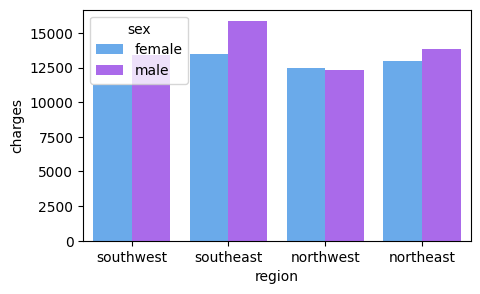

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(5, 3))

# duckdb의 수행결과를 df 데이터프레임에 반환
df = conn.sql("SELECT * FROM insurance;").df()

ax = sns.barplot(x = 'region', 
                 y = 'charges', 
                 hue = 'sex', 
                 data = df, 
                 palette = 'cool', 
                 errorbar = None)

In [104]:
type(df)

pandas.core.frame.DataFrame

### 영구 저장소(Disk Storage)
#### - DuckDB는 프로세스 내에서 실시간으로 메모리에 DB를 생성하고 프로세스가 종료되면 삭제됨
#### - DB Connect시 물리적은 디스크를 지정하면 프로세스가 끝나도 결과가 파일에 저장되고 다시 읽어올수 있음

In [128]:
con = dk.connect('./duckdb/duckdb_test.db')
con.execute('INSTALL spatial') # 확장프로그램(spatial) 최초 한번만 실행하면 됨
con.execute('LOAD spatial') # 확장프로그램(spatial) 최초 한번만 실행하면 됨

In [129]:
start = time.time()
con.sql("CREATE TABLE dugo AS SELECT * FROM st_read('./duckdb/dugo.xlsx');")
end = time.time()
sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

0:00:31.913114


In [130]:
con.sql('select * from information_schema.tables;')

┌───────────────┬──────────────┬────────────┬────────────┬───┬────────────────────┬──────────┬───────────────┐
│ table_catalog │ table_schema │ table_name │ table_type │ … │ is_insertable_into │ is_typed │ commit_action │
│    varchar    │   varchar    │  varchar   │  varchar   │   │      varchar       │ varchar  │    varchar    │
├───────────────┼──────────────┼────────────┼────────────┼───┼────────────────────┼──────────┼───────────────┤
│ duckdb_test   │ main         │ dugo       │ BASE TABLE │ … │ YES                │ NO       │ NULL          │
├───────────────┴──────────────┴────────────┴────────────┴───┴────────────────────┴──────────┴───────────────┤
│ 1 rows                                                                                12 columns (7 shown) │
└────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [132]:
con.sql("select 검사결과등록세관부호,count(*) cns from dugo group by 검사결과등록세관부호 order by 2 desc;")

┌──────────────────────┬────────┐
│ 검사결과등록세관부호 │  cns   │
│       varchar        │ int64  │
├──────────────────────┼────────┤
│ 040                  │ 775718 │
│ 140                  │  83316 │
│ 041                  │  47430 │
│ 020                  │  31828 │
│ 120                  │  27901 │
│ 016                  │  24053 │
│ 030                  │  19800 │
│ 090                  │  11918 │
│ 080                  │  11173 │
│ 071                  │   7683 │
│  ·                   │      · │
│  ·                   │      · │
│  ·                   │      · │
│ 053                  │      9 │
│ 154                  │      6 │
│ 050                  │      5 │
│ 054                  │      5 │
│ 122                  │      5 │
│ 103                  │      4 │
│ 052                  │      4 │
│ 012                  │      3 │
│ 051                  │      2 │
│ 017                  │      1 │
├──────────────────────┴────────┤
│ 27 rows (20 shown)  2 columns │
└───────────────────────

In [133]:
# 연결종료
con.close()

In [134]:
# DB연결
con = dk.connect('./duckdb/duckdb_test.db')

In [135]:
# DB에 저장된 테이블을 조회
con.sql("select 검사결과등록세관부호,count(*) cns from dugo group by 검사결과등록세관부호 order by 2 desc;")

┌──────────────────────┬────────┐
│ 검사결과등록세관부호 │  cns   │
│       varchar        │ int64  │
├──────────────────────┼────────┤
│ 040                  │ 775718 │
│ 140                  │  83316 │
│ 041                  │  47430 │
│ 020                  │  31828 │
│ 120                  │  27901 │
│ 016                  │  24053 │
│ 030                  │  19800 │
│ 090                  │  11918 │
│ 080                  │  11173 │
│ 071                  │   7683 │
│  ·                   │      · │
│  ·                   │      · │
│  ·                   │      · │
│ 053                  │      9 │
│ 154                  │      6 │
│ 050                  │      5 │
│ 122                  │      5 │
│ 054                  │      5 │
│ 052                  │      4 │
│ 103                  │      4 │
│ 012                  │      3 │
│ 051                  │      2 │
│ 017                  │      1 │
├──────────────────────┴────────┤
│ 27 rows (20 shown)  2 columns │
└───────────────────────